In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pylab as plt
from pylab import rcParams
import seaborn as sb

from IPython.display import Image
from IPython.core.display import HTML

import sklearn
from sklearn import datasets

from sklearn import decomposition
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

# Factor Analysis on Iris Dataset

In [22]:
iris = datasets.load_iris()
X = iris.data#[:, :2]  # we only take the first two features.
y = iris.target
variable_names = iris.feature_names

print(X.shape, y.shape)
print(X[:10,])

(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [23]:
factor = FactorAnalysis().fit(X)

pd.DataFrame(factor.components_, columns=variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


# PCA on the Iris Dataset

In [5]:
iris = datasets.load_iris()
X = iris.data
variable_names= iris.feature_names
print(X.shape)
X[0:10,]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
#substantiate the pca
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

In [7]:
#explained variane ratio
print(pca.explained_variance_ratio_)
#cummulative variance
print(pca.explained_variance_ratio_.sum())

[0.92461872 0.05306648 0.01710261 0.00521218]
1.0


In [9]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


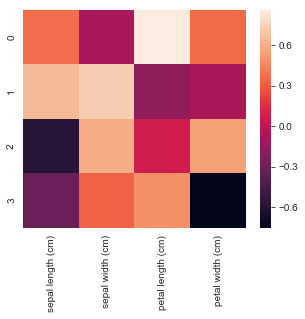

In [10]:
sb.heatmap(comps)

# Outlier Analysis

## Univariate Outlier Analysis

In [96]:
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df2 = pd.DataFrame(iris.target, columns=['Species'])

df2.loc[df2.Species == 0, 'Species'] = "setosa"
df2.loc[df2.Species == 1, 'Species'] = "versicolor"
df2.loc[df2.Species == 2, 'Species'] = "virginica"
df2.to_dict()

df = pd.concat([df1, df2], axis=1)
print(df[:5])

X = df.iloc[:, 0:4].values
y = iris.target

print(X.shape, y.shape)
print(X[:10,])
Y[:]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Identifying outliers from Tukey boxplots

[]

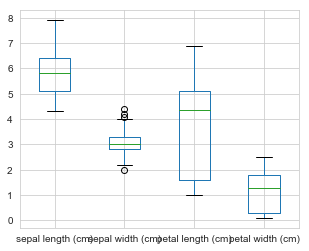

In [97]:
df.boxplot(return_type='dict')
plt.plot()

In [80]:
Sepal_Width = X[:, 1]
iris_outlier = (Sepal_Width > 4)
df[iris_outlier]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [82]:
Sepal_Width = X[:, 1]
iris_outlier = (Sepal_Width < 2.05)
df[iris_outlier]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
60,5.0,2.0,3.5,1.0,1


### Apply Tukey outlier labling

In [87]:
pd.options.display.float_format= '{:.1f}'.format
X_df = pd.DataFrame(X)
print (X_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


## Multivariate Outlier Analysis

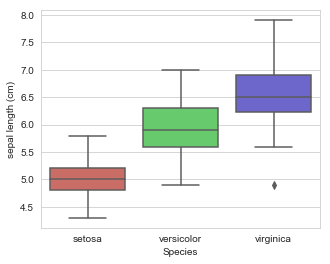

In [98]:
sb.boxplot(x='Species', y='sepal length (cm)', data=df, palette='hls')

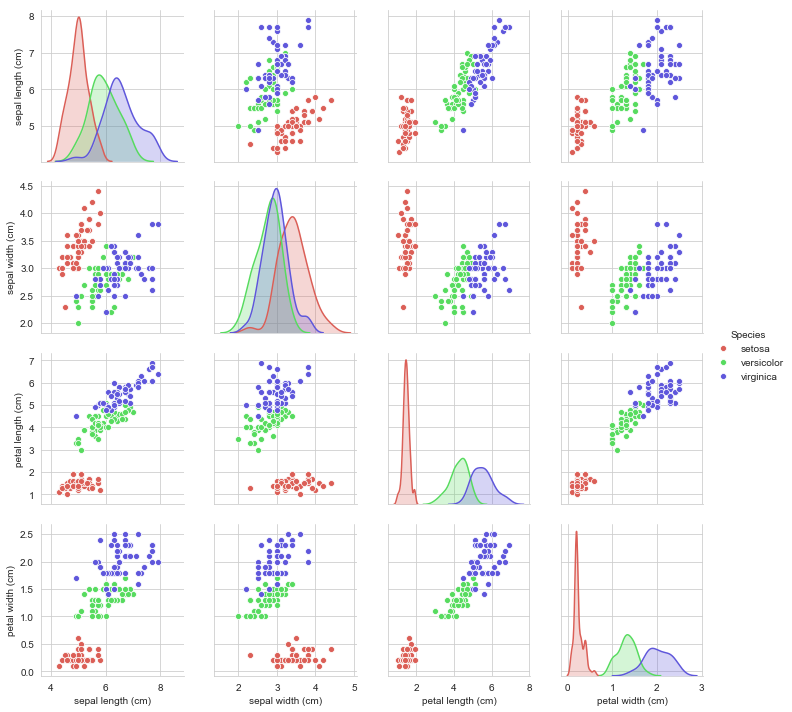

In [99]:
sb.pairplot(df, hue='Species', palette='hls')

# DBSCAN for Outlier Detection

Outliers should make up <5% of the total oberservation - adjust the model parameters accordingly to achieve this goal.<br>
__eps__: max distance btw two samples for them to be clustered in the same neighbourhood (start at eps=0.1) <br>
__min_sample__: the min number of samples in a neighbourhood for a data point to qualify as a core point (start with a very low sample size)